# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [103]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dataframe_image as dfi

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

### Merge the DataFrames

In [104]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [105]:
# Create the city DataFrames.
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [106]:
# 2. Get the total drivers for each city type
driver_totals = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_totals

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [107]:
#  3. Get the total amount of fares for each city type
fare_totals = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_totals


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [108]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / ride_count
avg_fares_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [109]:
# 5. Get the average fare per driver for each city type. 
avg_fares_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / driver_totals
avg_fares_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [110]:
#  6. Create a PyBer summary DataFrame. 
PyBer_Summary_df=pd.DataFrame(
    {"Total Rides": ride_count,
    "Total Drivers": driver_totals,
    "Total Fares": fare_totals,
    "Average Fare Per Ride": avg_fares_per_ride,
    "Average Fare Per Driver": avg_fares_per_driver})


In [111]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_Summary_df.index.name=None

In [112]:
#  8. Format the columns.
PyBer_Summary_df['Total Rides'] = PyBer_Summary_df["Total Rides"].map("{:,}".format)
PyBer_Summary_df['Total Drivers'] = PyBer_Summary_df["Total Drivers"].map("{:,}".format)
PyBer_Summary_df['Total Fares'] = PyBer_Summary_df["Total Fares"].map("${:,.2f}".format)
PyBer_Summary_df['Average Fare Per Ride'] = PyBer_Summary_df['Average Fare Per Ride'].map("${:,.2f}".format)
PyBer_Summary_df['Average Fare Per Driver'] = PyBer_Summary_df['Average Fare Per Driver'].map("${:,.2f}".format)
PyBer_Summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [113]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [114]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_datetime_df=pyber_data_df.groupby(['type', 'date']).sum()['fare']
pyber_data_datetime_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [115]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_datetime_noindex=pyber_data_datetime_df.reset_index()
pyber_data_datetime_noindex

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [116]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_pivot= pyber_data_datetime_noindex.pivot(index=['date'], columns=['type'], values=['fare'])
pyber_data_pivot

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [117]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_jantomay = pyber_data_pivot.loc['2019-01-01':'2019-04-29']
pyber_data_jantomay.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [118]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_data_jantomay.index = pd.to_datetime(pyber_data_jantomay.index)
pyber_data_jantomay.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [119]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_jantomay.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [120]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_byweek = pd.DataFrame(pyber_data_jantomay.resample("W").sum())
pyber_data_byweek

#Save dataframe as fig (installed dfi pip to conda for saving dataframes)
dfi.export(pyber_data_byweek, 'analysis/fig8.png')

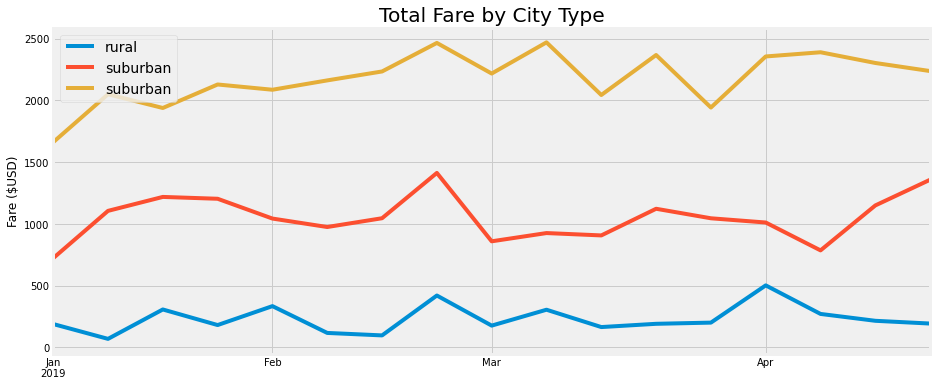

In [121]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax=pyber_data_byweek.plot(figsize=(14,6), )

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Add the title, y-axis label and grid.
ax.set_title("Total Fare by City Type")
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('')
ax.legend(['rural','suburban','suburban'], mode="expanded", loc="best")
plt.savefig('analysis/Fig9.png')